In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
df=pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])
x_train,x_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2,random_state=17)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((4457,), (1115,), (4457,), (1115,))

In [45]:
vec=CountVectorizer()
x_train_vec=vec.fit_transform(x_train)
x_test_vec=vec.transform(x_test)
x_train_vec.shape,x_test_vec.shape
x_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
model = MultinomialNB()
model.fit(x_train_vec, y_train)

y_pred = model.predict(x_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9901345291479821


Confusion Matrix:
 [[966   4]
 [  7 138]]


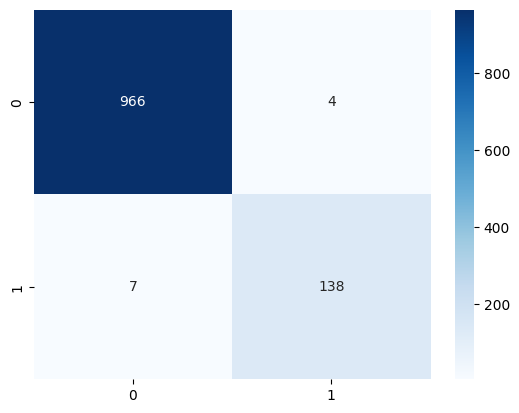


Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       970
        spam       0.97      0.95      0.96       145

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [47]:
import seaborn as sns
from matplotlib import pyplot as plt
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.show()
print('\nClassification Report:\n',classification_report(y_test,y_pred))
